In [1]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y) 

SVC()

In [2]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()# Select 2 features / variables
X = iris.data[0:, 0:2] # length 랑 width 가져옴 로드 한 데이터라 인덱스 값이 생략 되어 있는 형태 
#print(iris)
y = iris.target # 종류가 적혀져 있는 target 데이터. 데이터 셋에서 로드 할 때 default로 있는 값
print(y)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


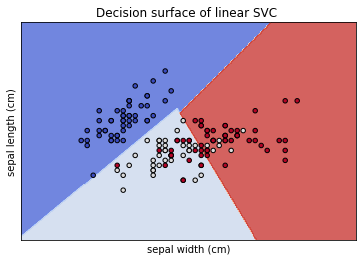

In [3]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()# Select 2 features / variables
X = iris.data[0:, :2] # length 랑 width 가져옴 
y = iris.target # 종 별로 구분 
feature_names = iris.feature_names[:2]
classes = iris.target_names #iris의 종 이름을 타겟으로 지정

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() -1, x.max() + 1
    y_min, y_max = y.min() -1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# The classification SVC model
model = svm.SVC(kernel="linear")    # 선형 학습
clf = model.fit(X, y)


fig, ax = plt.subplots()

#시각화
# title for the plots
title = ("Decision surface of linear SVC ")
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()



In [4]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()# Select 2 features / variables
X = iris.data[0:, :2] # length 랑 width 가져옴 
y = iris.target # 종 별로 구분 
feature_names = iris.feature_names[:2]
classes = iris.target_names

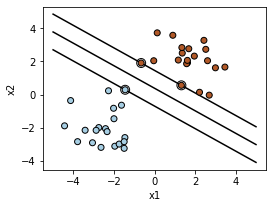

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
np.random.seed(2)
# we create 40 linearly separable points
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
# fit the model
clf = svm.SVC(kernel="linear", C=1) # c는 하이퍼 파라미터로 여백을 결정 할 수 있음. 값을 크게하면 overfitting이 되고 값을 너무 적게하면 underfitting이 발생함. 그렇기에 적절한 값을 집어넣는게 필요함.
clf.fit(X, Y)


# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()